## Recurrent Neural Networks Lulo Bogota

In [9]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
lulo = pd.read_csv('data/csv/Lulo.csv')
lulo = lulo.rename(columns={ lulo.columns[0] : 'time' })
lulo['time'] = pd.to_datetime(lulo['time'], format='%Y%m%d')
lulo['days'] = (pd.to_datetime(lulo['time'], unit='D') - lulo.time.min()).dt.days
lulo = lulo.set_index(['time'])
del lulo.index.name
lulo.sort_values(["days"], inplace=True, ascending=True)   
lulo.head()

,armenia_precio,armenia_var,barranquilla_precio,barranquilla_var,bogota_precio,bogota_var,bucaramanga_precio,bucaramanga_var,cali_precio,cali_var,...,santa_marta_var,sincelejo_precio,sincelejo_var,tunja_precio,tunja_var,valledupar_precio,valledupar_var,villavicencio_precio,villavicencio_var,days
2012-06-12,NaN,NaN,3100.0,-0.088235,2400.0,0.000000,2150.0,-0.035874,1900.0,-0.095238,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
2012-06-13,NaN,NaN,3150.0,0.016129,2250.0,-0.062500,2150.0,0.000000,1900.0,0.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
2012-06-14,NaN,NaN,3150.0,0.016129,2200.0,-0.022222,2120.0,-0.013953,2075.0,0.092105,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2
2012-06-15,NaN,NaN,3100.0,-0.015873,2200.0,0.000000,2130.0,0.004717,2075.0,0.092105,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3
2012-06-19,NaN,NaN,3100.0,-0.015873,2100.0,-0.106383,1970.0,0.010256,2000.0,-0.036145,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7


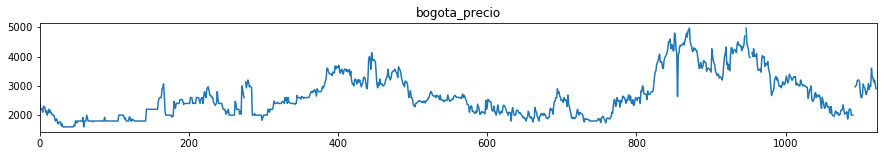

In [6]:
signal = lulo.bogota_precio.as_matrix()
plt.figure(figsize=(15,2))
plt.plot(signal)
plt.xlim([0, len(lulo)])
plt.title('bogota_precio')
plt.show()

# average

In [39]:
def average_without_NaN(Array):
    add = 0
    count = 0
    for i in Array:
        if np.isnan(i):
            continue;
        add += i
        count += 1
    
    if count == 0 : return 0
    return add / count 

In [51]:
def moving_average(s, wsize):
    #
    result = [ average_without_NaN(s[k:k+wsize]) for k in range(len(s)-wsize) ]
    
    return np.array(result)

In [58]:
a_signal = moving_average(signal,10)

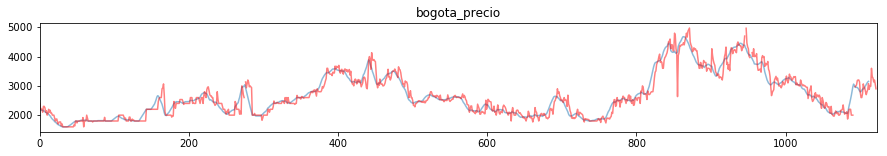

In [70]:

plt.figure(figsize=(15,2))
plt.plot(a_signal,alpha=.5)
plt.plot(signal, alpha=.5, color="red")
plt.xlim([0, len(lulo)])
plt.title('bogota_precio')
plt.show()

/home/afbayonac/anaconda3/lib/python3.5/site-packages/sklearn/preprocessing/data.py:321: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  warnings.warn(DEPRECATION_MSG_1D, DeprecationWarning)
/home/afbayonac/anaconda3/lib/python3.5/site-packages/sklearn/preprocessing/data.py:356: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  warnings.warn(DEPRECATION_MSG_1D, DeprecationWarning)


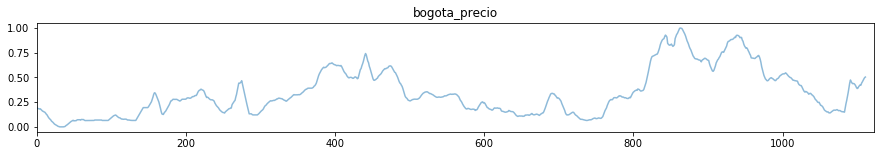

In [74]:
signal_normalized = MinMaxScaler().fit_transform(a_signal)
plt.figure(figsize=(15,2))
plt.plot(signal_normalized, alpha=.5)
plt.xlim([0, len(lulo)])
plt.title('bogota_precio')
plt.show()

In [62]:
def make_seqs(s, seq_len):
    result = [ np.array(s[i: i+seq_len]) for i in range(len(s)-seq_len) ]  
    return np.array(result)

def prepare_data(seqs, train_pct):

    X_train = seqs[0:int(len(seqs)*train_pct),0:seqs.shape[1]-1]
    y_train = seqs[0:int(len(seqs)*train_pct),seqs.shape[1]-1:].flatten()
    X_test  = seqs[int(len(seqs)*train_pct):,0:seqs.shape[1]-1]
    y_test  = seqs[int(len(seqs)*train_pct):,seqs.shape[1]-1:].flatten()
   
    return X_train, y_train, X_test, y_test

(1012, 100)
(506, 99) (506, 99) (506,) (506,)


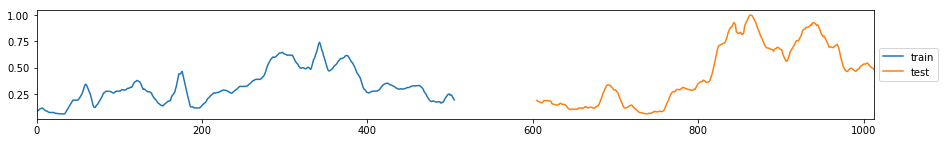

In [77]:
seqs = make_seqs(signal_normalized, seq_len=100)
X_train, y_train, X_test, y_test = prepare_data(seqs, train_pct=.5)

print (seqs.shape)
#print(X_train, y_train, X_test, y_test)
print (X_train.shape, X_test.shape, y_train.shape, y_test.shape)
plt.figure(figsize=(15,2))
plt.plot(y_train, label="train")
plt.plot(list(np.ones(len(y_train)+X_train.shape[1])*np.nan)+list(y_test), label="test")
plt.xlim([0, len(seqs)])
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

In [80]:
def create_rnn(seq_len, n_out):
    from keras.models import Sequential
    from keras.layers.core import Dense, Dropout
    from keras.layers.recurrent import LSTM
    model = Sequential()
    model.add(LSTM(output_dim=n_out, input_dim=seq_len))
    model.add(Dropout(0.6))
    model.add(Dense(1))
    
    return model

In [89]:
import sys

wsize, seqlen = 5,50
LSTM_output   = 20

# obtain timeseries dataset

signal = lulo.bogota_precio.as_matrix()
a_signal = moving_average(signal,10)
signal_normalized = MinMaxScaler().fit_transform(a_signal)
seqs = make_seqs(signal_normalized, seq_len=seqlen)
X_train, y_train, X_test, y_test = prepare_data(seqs, train_pct=.5)

# reformat dataset as Keras needs them
X_train = np.reshape(X_train, (X_train.shape[0], 1, X_train.shape[1]))
X_test = np.reshape(X_test, (X_test.shape[0], 1, X_test.shape[1]))

# create and compile model
model = create_rnn(seqlen-1, LSTM_output)
print ("compiling ... ")
sys.stdout.flush()
model.compile(loss='mean_squared_error', optimizer='adam')
print ("done")

/home/afbayonac/anaconda3/lib/python3.5/site-packages/sklearn/preprocessing/data.py:321: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  warnings.warn(DEPRECATION_MSG_1D, DeprecationWarning)
/home/afbayonac/anaconda3/lib/python3.5/site-packages/sklearn/preprocessing/data.py:356: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  warnings.warn(DEPRECATION_MSG_1D, DeprecationWarning)


compiling ... 
done


In [90]:
batch_size = 25
nb_epoch  = 20

model.fit(X_train, y_train, nb_epoch=nb_epoch, batch_size=batch_size, verbose=False)


In [91]:
preds =  model.predict(X_test)[:,0]

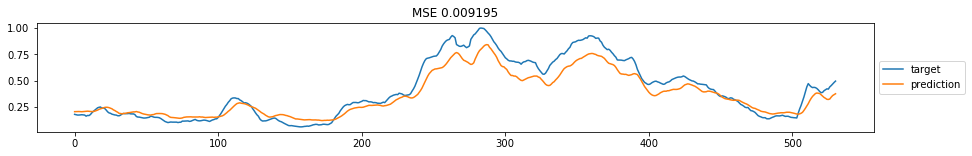

In [92]:
plt.figure(figsize=(15,2))
from sklearn.metrics import mean_squared_error
plt.title("MSE %.6f"%mean_squared_error(y_test, preds))
plt.plot(y_test, label="target")
plt.plot(preds, label="prediction")
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

In [94]:
diff_ytest = y_test[1:]>y_test[:1]
diff_preds = preds[1:]>preds[:1]
print ("%.3f"%(np.sum(diff_preds==diff_ytest)*1./len(diff_preds)))

0.915
